# Problem 2

## Task 1(a)

In [9]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = datasets.load_iris(as_frame=True)

# Select petal length and petal width features and 'setosa' and 'versicolor' classes(Target = 0 | 1)
X = iris.data[['petal length (cm)', 'petal width (cm)']]
y = iris.target[(iris.target == 0) | (iris.target == 1)]

X = X.loc[y.index] # Selecting the same rows in X as in y

# Convert Pandas dataframe to numpy array as we are working with numbers
X_np = X.values
y_np = y.values

# Normalize the dataset
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Spliting the dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

## Task 1(b)

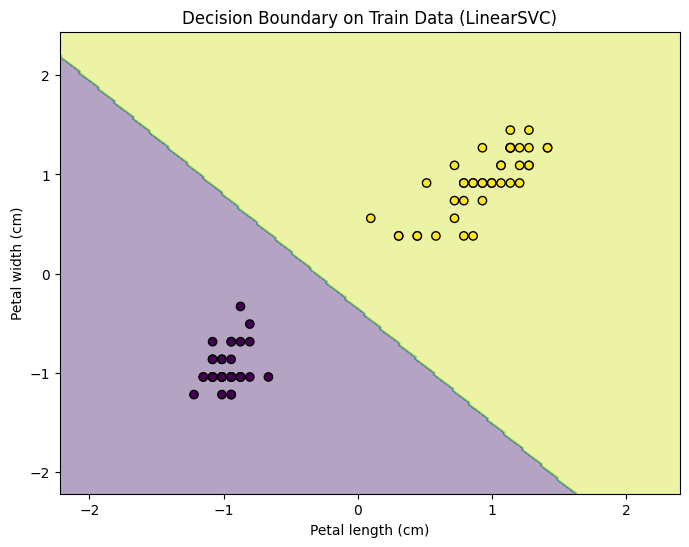

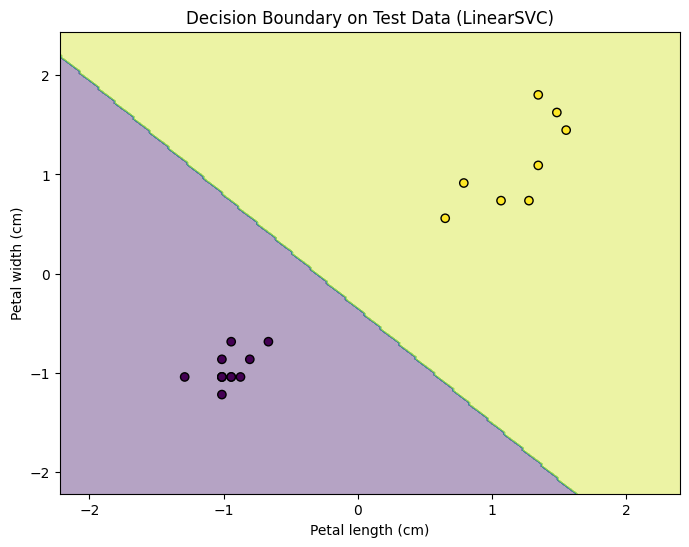

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC

# Train Linear Support Vector Classifier
clf = LinearSVC(random_state=0, C=1.0) # C is the regularization parameter
clf.fit(X_train, y_train)


# Plot decision boundary on training data
plt.figure(figsize=(8, 6))
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k')
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title('Decision Boundary on Train Data (LinearSVC)')
plt.show()


# Plot decision boundary on test data
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4) # Use the same decision boundary as above
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k')
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title('Decision Boundary on Test Data (LinearSVC)')
plt.show()


## Task 2(a)

In [11]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# Generate a synthetic dataset with make_moons
X, y = make_moons(n_samples=500, noise=0.05, random_state=42)


## Task 2(b)

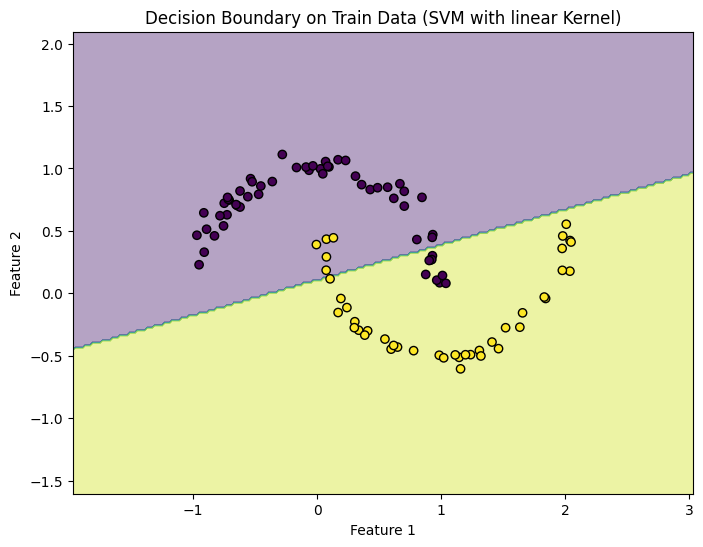

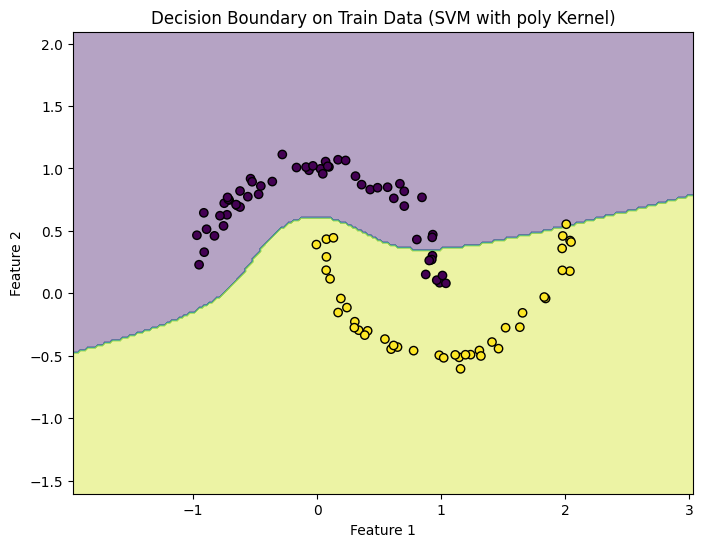

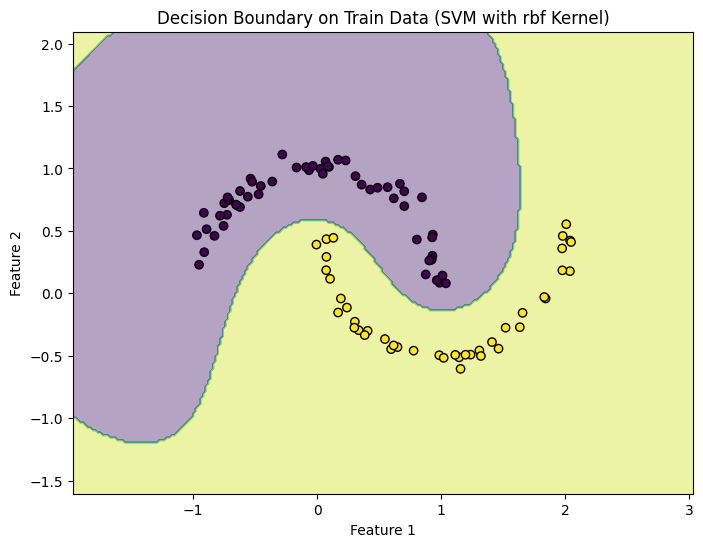

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42)

# Define kernels
kernels = ['linear', 'poly', 'rbf']

# Iterate through each kernel
for kernel in kernels:
    # Create and train SVM classifier
    if kernel == 'linear':
        clf = SVC(kernel=kernel, C=1)
    else:
        clf = SVC(kernel=kernel, C=1, gamma='scale')  # Use gamma='scale' for 'Polynomial' and 'RBF'
    clf.fit(X_train, y_train)

    # Plot decision boundary for each Kernel
    plt.figure(figsize=(8, 6))
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Decision Boundary on Train Data (SVM with {kernel} Kernel)')
    plt.show()


Analysis of Decision Boundaries with Different Kernels

Linear Kernel:

The linear kernel creates a straight line as the decision boundary.

It tries to find a hyperplane that best separates the data points into two classes.

It works well when the data is linearly separable, but may not perform well when the data is complex or non-linear.

In this case, since the data is non-linear (make_moons dataset), the linear kernel is unable to perfectly separate the two classes, leading to some misclassifications.

Polynomial Kernel:

The polynomial kernel creates a more complex decision boundary that can be curved or non-linear.

It uses a polynomial function to map the data points to a higher-dimensional space where they might be linearly separable.

The degree of the polynomial can be controlled using the degree parameter in the SVC function.

In this case, the polynomial kernel is able to better capture the non-linearity of the data compared to the linear kernel. The decision boundary is curved and separates the two classes more effectively.

RBF Kernel (Radial Basis Function):

The RBF kernel is a popular choice for non-linear data.

It uses a radial basis function to map the data points to a higher-dimensional space.

The gamma parameter controls the width of the Gaussian kernel used in the RBF kernel.

A small gamma value results in a smoother decision boundary, while a large gamma value results in a more complex and potentially overfit boundary.

In this case, the RBF kernel with the default gamma='scale' is able to create a decision boundary that closely follows the shape of the data, effectively separating the two classes.

## Task 2(c)

In [13]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}

# Create an RBF kernel SVM model
rbf_svm = SVC(kernel='rbf')

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(rbf_svm, param_grid, cv=5) # cv is the cross-validation folds
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Use the best model to make predictions on the test data
best_rbf_svm = grid_search.best_estimator_
y_pred = best_rbf_svm.predict(X_test)


Best hyperparameters: {'C': 1, 'gamma': 1}
Best score: 1.0


## Task 2(d)

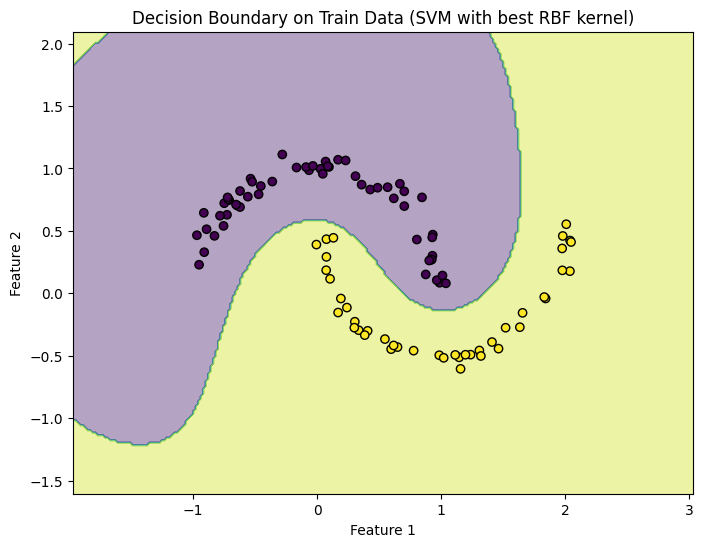

Explanation of Gamma and C:
Best Gamma: 1
Best C: 1


In [14]:
import matplotlib.pyplot as plt
import numpy as np
# Plot the decision boundary for the best RBF kernel SVM
plt.figure(figsize=(8, 6))
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = best_rbf_svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'Decision Boundary on Train Data (SVM with best RBF kernel)')
plt.show()

# Explain the impact of gamma and C
print("Explanation of Gamma and C:")
print(f"Best Gamma: {grid_search.best_params_['gamma']}")
print(f"Best C: {grid_search.best_params_['C']}")

 Gamma:

 A small gamma means a Gaussian kernel with a large variance.  The decision boundary will be smooth.

 A large gamma means a Gaussian kernel with a small variance.  The decision boundary will be more complex and follow the training data closely.

 In this context, a small gamma implies the model is less sensitive to individual data points.

 C:

 C is the regularization parameter.

 A small C creates a wider margin, allowing more misclassifications. This can lead to a smoother decision boundary.

 A large C penalizes misclassifications more heavily, resulting in a smaller margin and a more complex decision boundary that tries to fit the training data perfectly.

 The optimal values found by GridSearchCV provide a balance between fitting the training data and generalizing well to unseen data.